# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Simulando ID3</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

------------------------------
Predicción para el nuevo día: Si
------------------------------


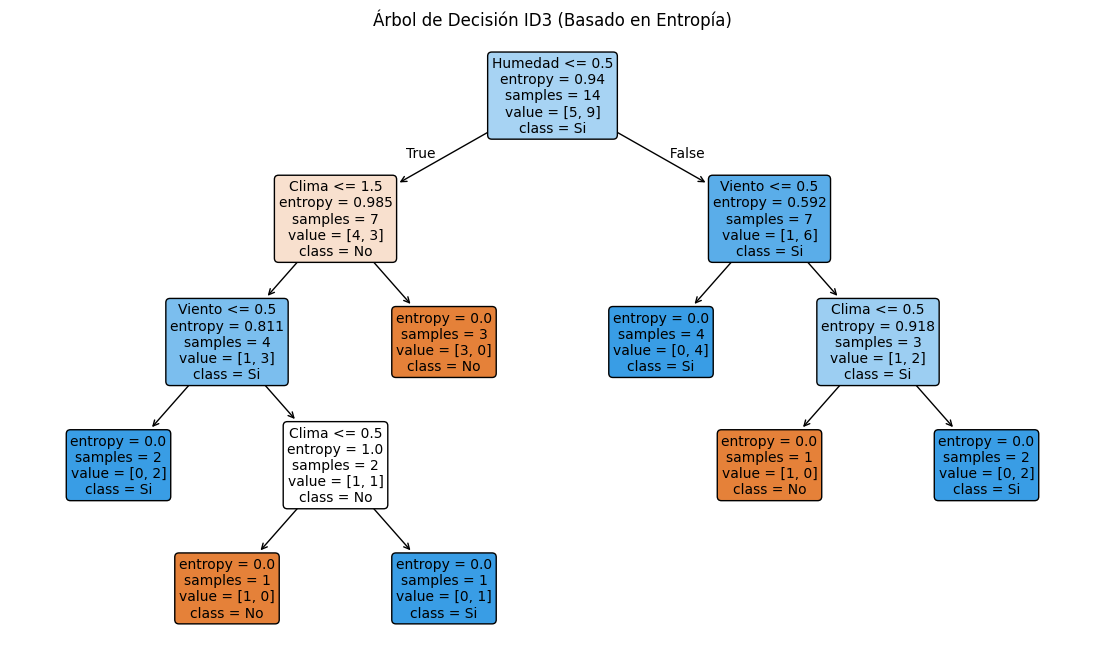

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# 1. Crear el dataset clásico de ID3: "Play Tennis" (Jugar Tenis)
data = {
    'Clima': ['Soleado', 'Soleado', 'Nublado', 'Lluvia', 'Lluvia', 'Lluvia', 'Nublado', 'Soleado', 'Soleado', 'Lluvia', 'Soleado', 'Nublado', 'Nublado', 'Lluvia'],
    'Temperatura': ['Calor', 'Calor', 'Calor', 'Templado', 'Frio', 'Frio', 'Frio', 'Templado', 'Frio', 'Templado', 'Templado', 'Templado', 'Calor', 'Templado'],
    'Humedad': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta'],
    'Viento': ['Debil', 'Fuerte', 'Debil', 'Debil', 'Debil', 'Fuerte', 'Fuerte', 'Debil', 'Debil', 'Debil', 'Fuerte', 'Fuerte', 'Debil', 'Fuerte'],
    'Jugar': ['No', 'No', 'Si', 'Si', 'Si', 'No', 'Si', 'No', 'Si', 'Si', 'Si', 'Si', 'Si', 'No']
}

df = pd.DataFrame(data)

# 2. Preprocesamiento: Convertir texto a números (Label Encoding)
# Guardamos los encoders en un diccionario para poder decodificar después
encoders = {}
df_encoded = df.copy()

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

# Separar características (X) y etiqueta (y)
X = df_encoded.drop('Jugar', axis=1)
y = df_encoded['Jugar']

# 3. Crear y entrenar el modelo simulando ID3
# Usamos criterion='entropy' para usar la Ganancia de Información
model_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_id3.fit(X, y)

# 4. Predicción para un nuevo día
# Datos: Soleado, Frio, Humedad Normal, Viento Debil
# Importante: Usamos un DataFrame con nombres de columnas para evitar el Warning
nuevo_dia_df = pd.DataFrame([[2, 0, 1, 0]], columns=['Clima', 'Temperatura', 'Humedad', 'Viento'])

# Realizar la predicción
pred_numerica = model_id3.predict(nuevo_dia_df)

# Convertir el número de vuelta a la etiqueta original ("Si" o "No")
resultado_final = encoders['Jugar'].inverse_transform(pred_numerica)

print("-" * 30)
print(f"Predicción para el nuevo día: {resultado_final[0]}")
print("-" * 30)

# 5. Visualización del Árbol
plt.figure(figsize=(14, 8))
plot_tree(model_id3, 
          feature_names=X.columns, 
          class_names=encoders['Jugar'].classes_, 
          filled=True, 
          rounded=True,
          fontsize=10)

plt.title("Árbol de Decisión ID3 (Basado en Entropía)")
plt.show()